<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/NETWORK_x_4_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#!pip install quandl
#!pip install topcorr

In [16]:
import quandl
import pandas as pd
import numpy as np
import requests
from quandl.errors.quandl_error import NotFoundError

In [17]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
from plotly.offline import init_notebook_mode

# plotly offline mode
init_notebook_mode(connected=True)
from IPython.core.display import HTML, display


In [18]:
startdate='2017-01-01'
enddate='2019-07-13' #yyyy-mm-dd

In [19]:
def download_from_BSE(datadump,startdate,enddate):
    data= {}
    df=pd.DataFrame()

    print(f'len of datadump {len(datadump)}')
    try:
      for i in range(len(datadump)):
          data[datadump[i]]= quandl.get('BSE/BOM'+datadump[i],start_date=startdate,end_date=enddate,authtoken="1Mz3xLNFNdUpKENCkArB")['Close']


      i=0
      for key , value in data.items():
        df.insert(i, key, value)
        i=i+1
    except NotFoundError:
      pass

    return df

In [20]:

rejectlst= ['543253','543213','543210','543233','543252','543249','543212','543242','543248','543066','543232','542759','543223','543238',\
            '543243','543235','543245','543220','543237','543240','543227','543228','543066',\
            ]


In [21]:
def get_bse_sector_list(data):


  if data=='LargeCap':
    url ='https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=93'
  if data== 'MidCap':
    url = 'https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=81'
  if data== 'SmallCap':
    url = 'https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=82'
  if data == 'BSE100':
    url = 'https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=22'
  if data=='SENSEX':
    url= 'https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=16'
  header = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest"
  }

  r = requests.get(url, headers=header)

  dfs = pd.read_html(r.text)
  dataframe=dfs[1]
  dataframe.columns=dataframe.iloc[0]
  scrip_code=dataframe['Scrip Code'].tolist()
  scrip_code.remove('Scrip Code')
  #scrip_code = [int(i) for i in scrip_code]
  return scrip_code
def do_feature_engineering(datadump,startdate,enddate,rejectlst=rejectlst):
  datadump=[i for i in datadump if i not in rejectlst]
  data=download_from_BSE(datadump,startdate,enddate)
  return data

In [22]:
datadump=get_bse_sector_list('SENSEX')

In [23]:
data_index=do_feature_engineering(datadump,startdate,enddate)

len of datadump 30


In [24]:
data_index.head(2)

,500180,532454,500875,532755,532215,532540,500247,532281,500820,500112,...,500510,500114,500228,532978,500520,500034,532187,532555,500325,532174
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,1197.3,311.00,241.20,487.75,446.7,2359.05,714.05,829.3,903.55,243.60,...,1360.8,333.05,1634.25,2943.45,1224.9,869.95,1087.00,164.70,1083.10,251.8
2017-01-03,1190.4,303.65,243.25,490.95,455.2,2368.50,710.90,835.0,898.55,244.85,...,1368.0,348.15,1645.25,3021.30,1223.2,883.70,1101.25,165.55,1090.65,254.3


In [25]:
header = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest"
  }

In [27]:
url='https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=16'
r = requests.get(url,headers=header)
dfs = pd.read_html(r.text)
dataframe=dfs[1]
dataframe.columns=dataframe.iloc[0]
dataframe=dataframe[1:]
var=dataframe['Scrip Code'].tolist()
company = dataframe.Company.tolist()
print(dataframe.columns)
lst=dataframe['Scrip Code'].tolist()
lst1=data_index.columns.tolist()
itm=[item for item in lst if item not in lst1]
#lst.remove(itm)
data_index.columns=company

Index(['Scrip Code', 'Company', 'LTP', 'Change Val', 'Pts Contribution'], dtype='object', name=0)


In [28]:
len(company)

30

In [29]:
# create empty dataframe for log returns information
log_returns_df = pd.DataFrame()

# calculate log returns of each asset
# loop through each column in dataframe and and calculate the daily log returns
# add log returns column to new a dataframe
for col in data_index.columns:
    # if dates are given in reverse order then we need to set diff to -1.
    log_returns_df[col] = np.log(data_index[col]).diff(15)
'''
cols=['BSE METAL','BSE OIL and GAS','BSE BANKEX','BSE POWER','BSE REALTY','BSE Telecom',\
      'BSE Utilities','BSE AUTO','BSE Healthcare','BSE Information Technology',\
      'BSE Industrials','BSE Finance']
'''
#log_returns_df.columns=cols
# check output of log returns dataframe
log_returns_df.tail()

,HDFCBANK,BHARTIARTL,ITC,TECHM,AXISBANK,TCS,KOTAKBANK,HCLTECH,ASIANPAINT,SBIN,...,LT,TITAN,JSWSTEEL,BAJAJFINSV,M&M,BAJFINANCE,INDUSINDBK,NTPC,RELIANCE,ICICIBANK
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-08,-0.005777,0.037287,0.007239,-0.079494,0.008142,-0.031438,0.011006,-0.033566,-0.045274,0.050516,...,-0.005888,-0.002870,0.008243,-0.067631,0.017312,-0.015056,0.053365,-0.019477,-0.023369,0.027373
2019-07-09,-0.015764,0.046770,-0.009296,-0.092682,0.012737,-0.054883,0.000308,-0.063577,-0.044401,0.054059,...,0.014283,-0.135111,-0.002854,-0.050235,0.010410,0.026775,0.057825,-0.020973,-0.002420,0.015162
2019-07-10,-0.017942,0.047431,-0.014527,-0.086906,-0.003572,-0.069723,-0.015333,-0.063041,-0.043562,0.044304,...,-0.004227,-0.146310,-0.020959,-0.074400,0.009785,-0.028241,0.073082,-0.041720,0.000665,0.025975
2019-07-11,-0.007551,0.034117,-0.005246,-0.086310,-0.006241,-0.081109,-0.021647,-0.063041,-0.042169,0.050989,...,-0.040089,-0.175537,-0.006337,-0.095844,0.008718,-0.037861,0.070821,-0.042123,-0.012102,-0.015465
2019-07-12,-0.009108,0.033422,0.002549,-0.104332,-0.021606,-0.065192,-0.003732,-0.050394,-0.016440,0.039556,...,-0.048358,-0.159707,0.003363,-0.082592,0.007228,-0.054333,0.041675,-0.048344,0.001094,-0.008859


In [30]:
# calculate correlation matrix using inbuilt pandas function
correlation_matrix = log_returns_df.corr()

# show first five rows of the correlation matrix
correlation_matrix.head()
correlation_matrix.to_csv('corr.csv')

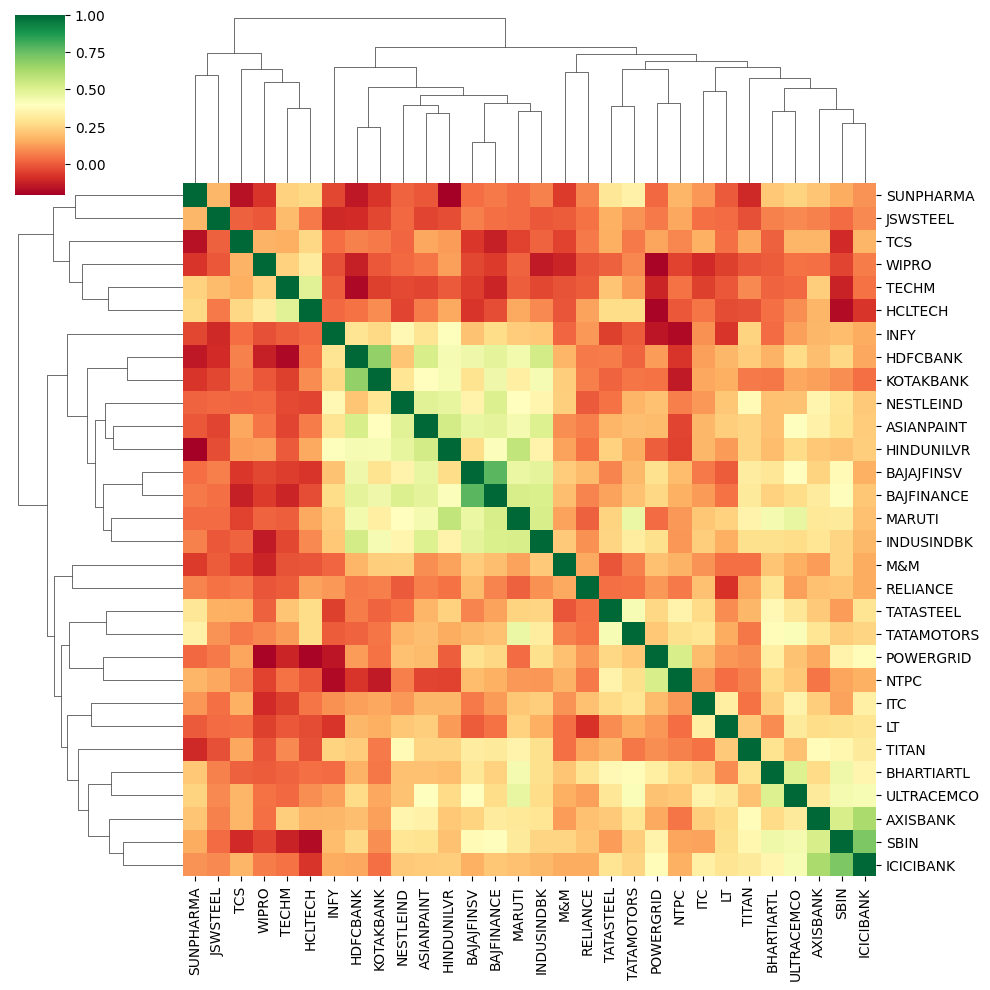

In [31]:
# visualise correlation matrix using a clustered heatmap
display(HTML("<h3>Clustered Heatmap: Correlations between asset price returns</h3>"))
sns.clustermap(correlation_matrix, cmap="RdYlGn")
plt.show()

In [32]:
# convert matrix to list of edges and rename the columns
edges = correlation_matrix.stack().reset_index()
edges.columns = ["asset_1", "asset_2", "correlation"]

# remove self correlations
edges = edges.loc[edges["asset_1"] != edges["asset_2"]].copy()

# show the first 5 rows of the edge list dataframe.
edges.head()

,asset_1,asset_2,correlation
1,HDFCBANK,BHARTIARTL,0.165909
2,HDFCBANK,ITC,0.129854
3,HDFCBANK,TECHM,-0.188366
4,HDFCBANK,AXISBANK,0.194518
5,HDFCBANK,TCS,0.070774


In [33]:
'''
header = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest"
  }

url='https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=81'
r = requests.get(url,headers=header)

dfs = pd.read_html(r.text)
dataframe=dfs[1]
dataframe.columns=dataframe.iloc[0]
dataframe=dataframe[1:]
var=dataframe['Scrip Code'][1:].tolist()
company = dataframe.Company[1:].tolist()
labeldict = {}
i=0
for item, variable in zip(company,var):

  labeldict[variable] = item
'''


'\nheader = {\n    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",\n    "X-Requested-With": "XMLHttpRequest"\n  }\n\nurl=\'https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=81\'\nr = requests.get(url,headers=header)\n\ndfs = pd.read_html(r.text)  \ndataframe=dfs[1]\ndataframe.columns=dataframe.iloc[0]\ndataframe=dataframe[1:]\nvar=dataframe[\'Scrip Code\'][1:].tolist()\ncompany = dataframe.Company[1:].tolist()\nlabeldict = {}\ni=0\nfor item, variable in zip(company,var):\n  \n  labeldict[variable] = item\n'

In [ ]:
# create undirected graph with weights corresponding to the correlation magnitude
G0 = nx.from_pandas_edgelist(edges, "asset_1", "asset_2", edge_attr=["correlation"])

# print out the graph info
# check number of nodes and degrees are as expected
# (all should have degree = 38, i.e. average degree = 38)
#print(nx.info(G0))

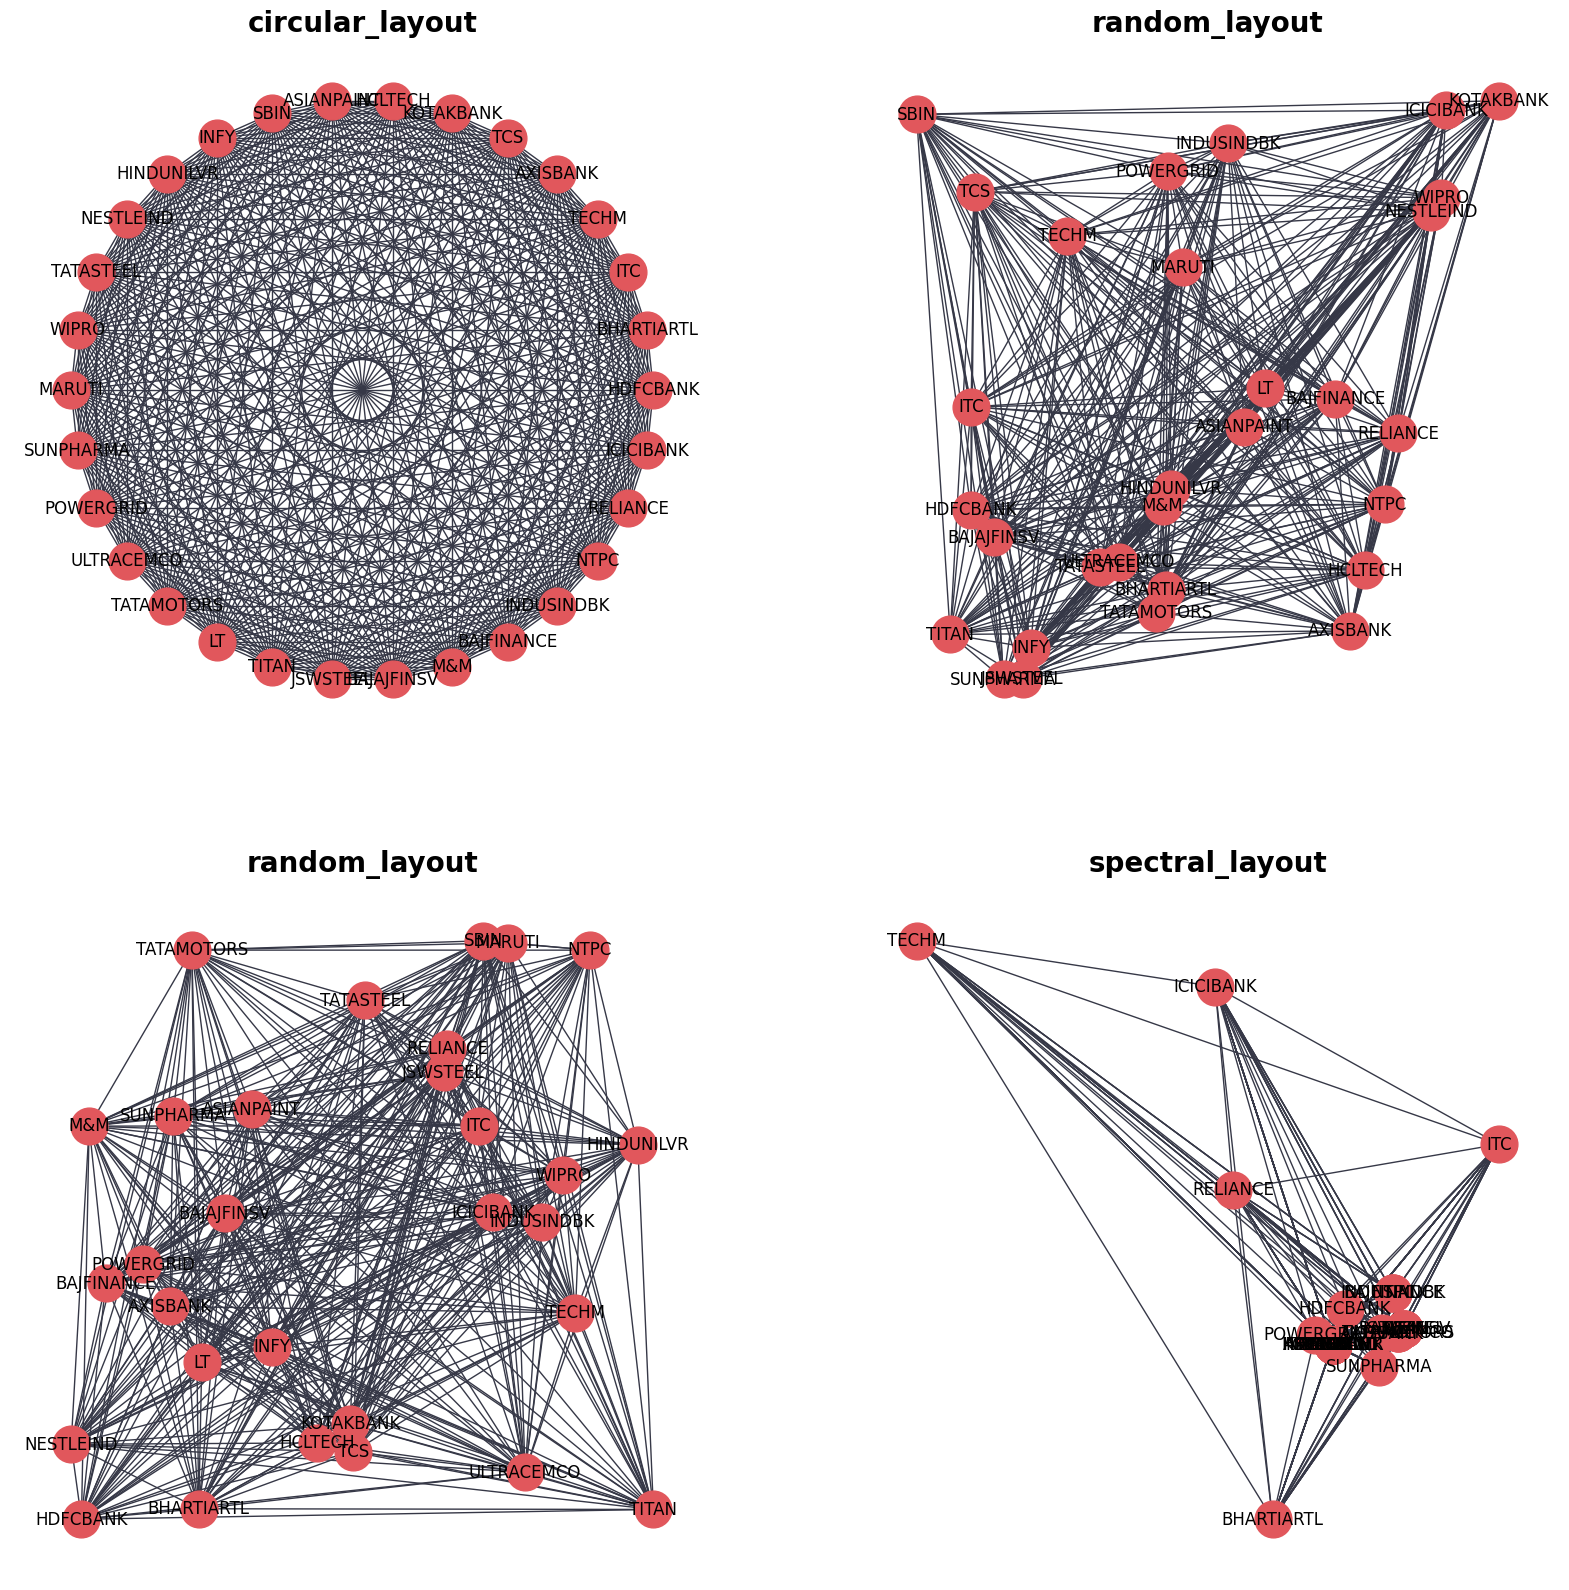

In [35]:
# create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# save different layout functions in a list
layouts = [nx.circular_layout, nx.random_layout,nx.random_layout,nx.spectral_layout]

# plot each different layout
for layout, ax in zip(layouts, axs.ravel()):
    nx.draw(
        G0,
        with_labels=True,
        node_size=700,
        node_color="#e1575c",
        edge_color="#363847",
        pos=layout(G0),
        ax=ax,
    )
    ax.set_title(layout.__name__, fontsize=20, fontweight="bold")

plt.show()

In [ ]:
# 'winner takes all' method - set minium correlation threshold to remove some
# edges from the diagram
threshold = 0.5

# create a new graph from edge list
Gx = nx.from_pandas_edgelist(edges, "asset_1", "asset_2", edge_attr=["correlation"])

# list to store edges to remove
remove = []
# loop through edges in Gx and find correlations which are below the threshold
for asset_1, asset_2 in Gx.edges():
    corr = Gx[asset_1][asset_2]["correlation"]
    # add to remove node list if abs(corr) < threshold
    if abs(corr) < threshold:
        remove.append((asset_1, asset_2))

# remove edges contained in the remove list
Gx.remove_edges_from(remove)

print(str(len(remove)) + " edges removed")

In [ ]:
def assign_colour(correlation):
    if correlation <= 0:
        return "#ffa09b"  # red
    else:
        return "#9eccb7"  # green


def assign_thickness(correlation, benchmark_thickness=5, scaling_factor=3):
    return benchmark_thickness * abs(correlation) ** scaling_factor


def assign_node_size(degree, scaling_factor=100):
    return degree * scaling_factor


# assign colours to edges depending on positive or negative correlation
# assign edge thickness depending on magnitude of correlation
edge_colours = []
edge_width = []
for key, value in nx.get_edge_attributes(Gx, "correlation").items():
    edge_colours.append(assign_colour(value))
    edge_width.append(assign_thickness(value))

# assign node size depending on number of connections (degree)
node_size = []
for key, value in dict(Gx.degree).items():
    node_size.append(assign_node_size(value))

In [ ]:
# draw improved graph
sns.set(rc={"figure.figsize": (9, 9)})
font_dict = {"fontsize": 18}

nx.draw(
    Gx,
    pos=nx.circular_layout(Gx),
    with_labels=True,
    node_size=node_size,
    node_color="#e1575c",
    edge_color=edge_colours,
    width=edge_width,
)
plt.title("Asset price correlations", fontdict=font_dict)
plt.show()

In [ ]:
# draw improved graph
nx.draw(
    Gx,
    pos=nx.circular_layout(Gx),
    with_labels=True,
    node_size=node_size,
    node_color="#e1575c",
    edge_color=edge_colours,
    width=edge_width,
)
plt.title("Asset price correlations - Circular layout", fontdict=font_dict)
plt.show()

In [ ]:
# create minimum spanning tree layout from Gx
# (after small correlations have been removed)
mst = nx.minimum_spanning_tree(Gx)

edge_colours = []

# assign edge colours
for key, value in nx.get_edge_attributes(mst, "correlation").items():
    edge_colours.append(assign_colour(value))


# draw minimum spanning tree. Set node size and width to constant
nx.draw(
    mst,
    with_labels=True,
    pos=nx.fruchterman_reingold_layout(mst),#fruchterman_reingold_layout
    node_size=100,
    node_color="#e1575c",
    edge_color=edge_colours,
    width=5.2,
)

# set title
plt.title("Asset price correlations - Minimum Spanning Tree", fontdict=font_dict)
plt.show()

In [ ]:


#An example for creating a PMFG

import topcorr

'''
p = 50
n = 200
C = make_spd_matrix(p)
X = np.random.multivariate_normal(np.zeros(p), C, n)
corr = np.corrcoef(X.T)
'''
corr=correlation_matrix.values
print(corr.shape)
topcorr_mst = topcorr.mst(corr)
topcorr_pmfg = topcorr.pmfg(corr)
topcorr_tmfg = topcorr.tmfg(corr)
topcorr_threshold = nx.from_numpy_array(topcorr.threshold(corr, 0.2))

print("MST edges: %s" % len(topcorr_mst.edges()))
print("PMFG edges: %s" % len(topcorr_pmfg.edges()))
print("TMFG edges: %s" % len(topcorr_tmfg.edges()))
print("Threshold edges: %s" % len(topcorr_threshold.edges()))

In [ ]:
header = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest"
  }

url='https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=16'
r = requests.get(url,headers=header)

dfs = pd.read_html(r.text)
dataframe=dfs[1]
dataframe.columns=dataframe.iloc[0]

company = dataframe.Company[1:].tolist()
labeldict = {}
i=0
for item in company:

  labeldict[i] = item
  i=i+1



In [ ]:
# assign edge colours
for key, value in nx.get_edge_attributes(topcorr_pmfg,'corr').items():
    edge_colours.append(assign_colour(value))


# draw minimum spanning tree. Set node size and width to constant
nx.draw(
    topcorr_pmfg,
    labels=labeldict,
    with_labels=True,
    pos=nx.fruchterman_reingold_layout(topcorr_pmfg),#fruchterman_reingold_layout
    node_size=100,
    node_color="#e1575c",
    edge_color=edge_colours,
    width=5.2,
)

# set title
plt.title("Asset price correlations - Minimum Spanning Tree", fontdict=font_dict)
plt.show()

In [ ]:
for component in nx.connected_components(topcorr_pmfg):
    # Each component is the set of nodes
    print(component)
    # Filter all edges in graph: we keep only that are in the component
    data=(list(
        filter(
            lambda x: x[0] in component and x[1] in component,
            topcorr_pmfg.edges
        )
    ))

In [ ]:
for i in range(30):
  if len(topcorr_pmfg.edges(i))<=3:
    print(topcorr_pmfg.edges(i))

In [ ]:
import datetime
dat=[0,4,5,14,21,22,23,29]
print(str(datetime.datetime.now())[:10])
for e in dat:
  print(labeldict[e])

In [ ]:
top_20=count.most_common()[::-1]
top_20

In [ ]:
sparse=[x[0] for x in top_20]

In [ ]:
print(enddate)
for item in sparse:
  print(labeldict[item])


In [ ]:
labeldict

In [ ]:
assert(False)

In [ ]:
"""
Create a network starting from a correlation matrix using PMFG algorithm
"""
#!pip install networkx==2.3
#!pip install planarity
import planarity
import progressbar


def get_network_PMFG(corr_matrix):

    #get the list of decreasing weighted links
    rholist = []
    n = len(corr_matrix)
    for i in range(n):
        for j in range(n):
            if i<j:
                if corr_matrix[i][j] != 0:
                    rholist.append([abs(float(corr_matrix[i][j])),i,j])

    rholist.sort(key=lambda x: x[0])
    rholist.reverse()

    m = len(rholist)
    filtered_matr = np.zeros((n, n))
    control = 0


    with progressbar.ProgressBar(max_value=m) as bar:
    #get the filtered adjacency matrix using PMFG algorithm
        for t in range(m):
            if control <= 3 * (n - 2) - 1:
                i = rholist[t][1]
                j = rholist[t][2]
                filtered_matr[i][j] = rholist[t][0]

                #check planarity here
                G = nx.Graph()
                for i in range(0,n):
                    for j in range(0,n):
                        if filtered_matr[i][j] != 0:
                            G.add_edge(int(i),int(j),weight = filtered_matr[i][j])
                if planarity.is_planar(G) == False:
                    filtered_matr[i][j] = 0
                    control = control +1
            bar.update(t)

    #build the network
    PMFG = nx.Graph()
    for i in range(0,n):
        for j in range(0,n):
            if filtered_matr[i][j] != 0:
                PMFG.add_edge(int(i),int(j),weight = filtered_matr[i][j])

    return PMFG

In [ ]:
file = '/content/corr.csv'

#load correlation matrix
corr_matrix = []
fh = open(file,'r')
for line in fh:
    s = line.strip().split(',')
    corr_matrix.append(s)
fh.close()

#get the network
G = get_network_PMFG(corr_matrix)

#save edges list
nx.write_weighted_edgelist(G, '/content/edgeslistP.txt')

In [ ]:
companies = dict()
fh = open('/content/components.csv','r')
for line in fh:
    s = line.strip().split(',')
    companies[s[1]] = float(s[0])
fh.close()
n = len(companies)

In [ ]:
#build network
fh=open('/content/edgeslistP.txt', 'r')
G_pearson = nx.Graph()
for line in fh:
    s = line.strip().split(' ')
    print(f's[0],s[1],weight :  {s[0]},{s[1]},{float(s[2])}')
    G_pearson.add_edge(s[0],s[1],weight = float(s[2]))
fh.close()

#list(nx.connected_component_subgraphs(B))[0]
#get giant component  list(B.subgraph(c) for c in nx.connected_components(B))[0]
pearson_components = sorted((nx.connected_component_subgraphs(G_pearson)), key=len, reverse=True)
pearson_GCC = pearson_components[0]

In [ ]:
import collections
import matplotlib.pyplot as plt
#Pearson
degree_sequence_P = sorted([d for n, d in G_pearson.degree()], reverse=True)
degreeCount_P = collections.Counter(degree_sequence_P)
deg_P, cnt_P = zip(*degreeCount_P.items())

plt.figure(figsize=(20,15))

ax1 = plt.subplot2grid((3, 3), (0, 0), ylabel='count')

ax1.bar(deg_P, cnt_P, width=0.80, label='Pearson')

ax1.grid()
ax1.legend(fontsize=15)


In [ ]:
#pearson
p_degree_dict = dict(G_pearson.degree())
keys = list(p_degree_dict.keys())
values = list(p_degree_dict.values())
print(keys)
print(values)
degree = [[float(k),float(v)] for k,v in zip(keys,values)]
degree.sort(key=lambda x: x[1])
degree.reverse()
degree.reverse()
pearson_first10 = [int(d[0]) for d in degree[0:10]]

In [ ]:
#pearson
degree.sort(key=lambda x: x[1])
degree.reverse()
pearson_first10 = [int(d[0]) for d in degree[0:10]]

In [ ]:
pearson_first10